In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports 
from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol

from qiskit import QuantumCircuit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService
from visualisation import LiveVisualizer
import matplotlib.pyplot as plt
import random

In [ ]:
# Setup Experiment
class Bell_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 4
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(4)
        circuit.h(0)
        circuit.cx(0, 1)
        circuit.h(2)
        circuit.cx(2, 3)
        return circuit

    def run_cuircuit_and_get_measurment(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        return [int(bit) for bit in list(max_hits)]
    
bell_protocol = Bell_Protocol()
# Create Classical Shadow Instance
bell_shadow = ClassicalShadow_1_CLIFFORD(bell_protocol)

In [ ]:
target_density_matrix = bell_shadow.get_original_density_matrix()
vis = LiveVisualizer(target_density_matrix)


while True:
    bell_shadow.add_snapshot()
    

    actual_density_matrix = bell_shadow.get_desity_matrix_from_snapshots()
    
    vis.update(actual_density_matrix,bell_shadow.get_shadow_size()) 

In [ ]:
# Setup Experiment
class SuperPos_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 6
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(6)
        circuit.h(0)
        circuit.cx(0, 1)
        circuit.h(2)
        circuit.cx(2, 3)
        circuit.h(4)
        circuit.cx(4, 5)
        return circuit

    def run_cuircuit_and_get_measurment(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        return [int(bit) for bit in list(max_hits)]
    
superpos_protocol = SuperPos_Protocol()
# Create Classical Shadow Instance
superpos_shadow = ClassicalShadow_1_CLIFFORD(superpos_protocol)

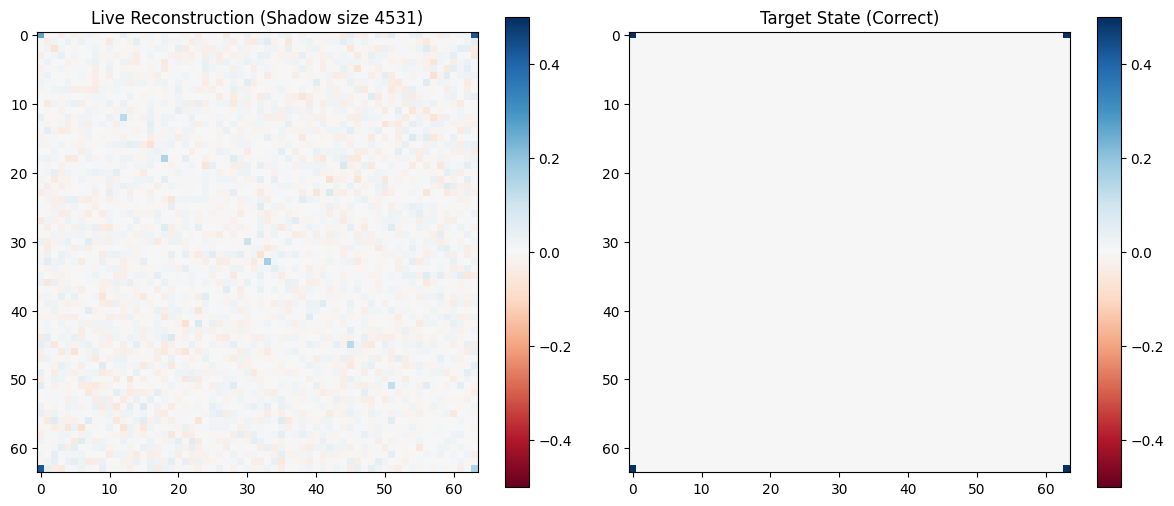

KeyboardInterrupt: 

In [23]:
target_density_matrix = superpos_shadow.get_original_density_matrix()
vis = LiveVisualizer(target_density_matrix)


while True:
    superpos_shadow.add_snapshot()
    
    actual_density_matrix = superpos_shadow.get_desity_matrix_from_snapshots()
    
    vis.update(actual_density_matrix,superpos_shadow.get_shadow_size()) 